<a href="https://colab.research.google.com/github/nikhil4859/Machine-learning/blob/main/Pollution_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #importing important libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive') #mounting the drive to Google Colab

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Datasets 

/content/drive/MyDrive/Datasets


In [4]:
df=pd.read_excel('Delhi_Pollution_data+29.xlsx') #loading the data set

In [5]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325,Very Poor
2005,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319,Very Poor
2006,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143,Moderate
2007,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454,Severe


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      2009 non-null   float64       
 14  AQI         2009 non-null   int64         
 15  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), fl

In [7]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,117.173678,232.192952,38.973863,50.781563,58.567023,41.979423,1.976053,15.821792,51.035794,3.544480,17.185042,1.131872,259.475361
std,82.874704,119.553356,33.374894,22.685704,37.690350,17.264428,2.560253,7.752520,25.548586,2.431232,15.291597,1.898028,119.239437
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.940000,0.000000,0.000000,0.000000,29.000000
25%,57.100000,138.810000,15.900000,33.900000,31.150000,31.220000,0.910000,10.460000,34.080000,1.870000,6.650000,0.410000,162.000000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.440000,2.960000,12.750000,0.650000,257.000000
75%,152.990000,307.380000,50.720000,63.570000,75.360000,48.680000,1.870000,19.360000,59.880000,4.680000,23.200000,0.910000,345.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.730000,20.640000,103.000000,23.300000,716.000000


In [10]:
df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate
5,Delhi,2020-06-26,50.01,112.08,9.67,22.06,21.75,32.64,1.01,11.66,24.82,2.07,23.31,0.70,104,Moderate
6,Delhi,2020-06-25,38.37,77.76,9.33,21.41,21.17,30.48,1.02,11.28,25.92,1.59,19.18,0.49,86,Satisfactory
7,Delhi,2020-06-24,30.91,62.61,6.63,16.84,15.72,31.45,0.89,11.02,24.77,1.28,12.13,0.27,71,Satisfactory
8,Delhi,2020-06-23,29.02,64.12,6.22,16.39,15.33,33.32,0.88,11.09,28.64,1.25,12.99,0.33,85,Satisfactory
9,Delhi,2020-06-22,39.47,77.48,5.67,20.61,17.46,34.32,0.91,11.08,42.76,1.54,18.47,0.37,104,Moderate


We will be going forward and be building a model which will predict the AQI_Bucket of Data Recorded on diffrent dates.

In [11]:
X = df.drop(['City',	'Date', 'AQI_Bucket'], axis = 1)

In [12]:
y = df['AQI_Bucket']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    2009 non-null   float64
 1   PM10     2009 non-null   float64
 2   NO       2009 non-null   float64
 3   NO2      2009 non-null   float64
 4   NOx      2009 non-null   float64
 5   NH3      2009 non-null   float64
 6   CO       2009 non-null   float64
 7   SO2      2009 non-null   float64
 8   O3       2009 non-null   float64
 9   Benzene  2009 non-null   float64
 10  Toluene  2009 non-null   float64
 11  Xylene   2009 non-null   float64
 12  AQI      2009 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 204.2 KB


<Axes: >

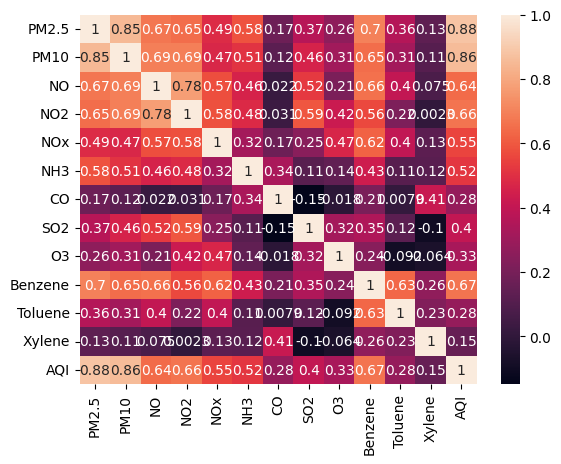

In [14]:
sns.heatmap(X.corr(), annot = True)

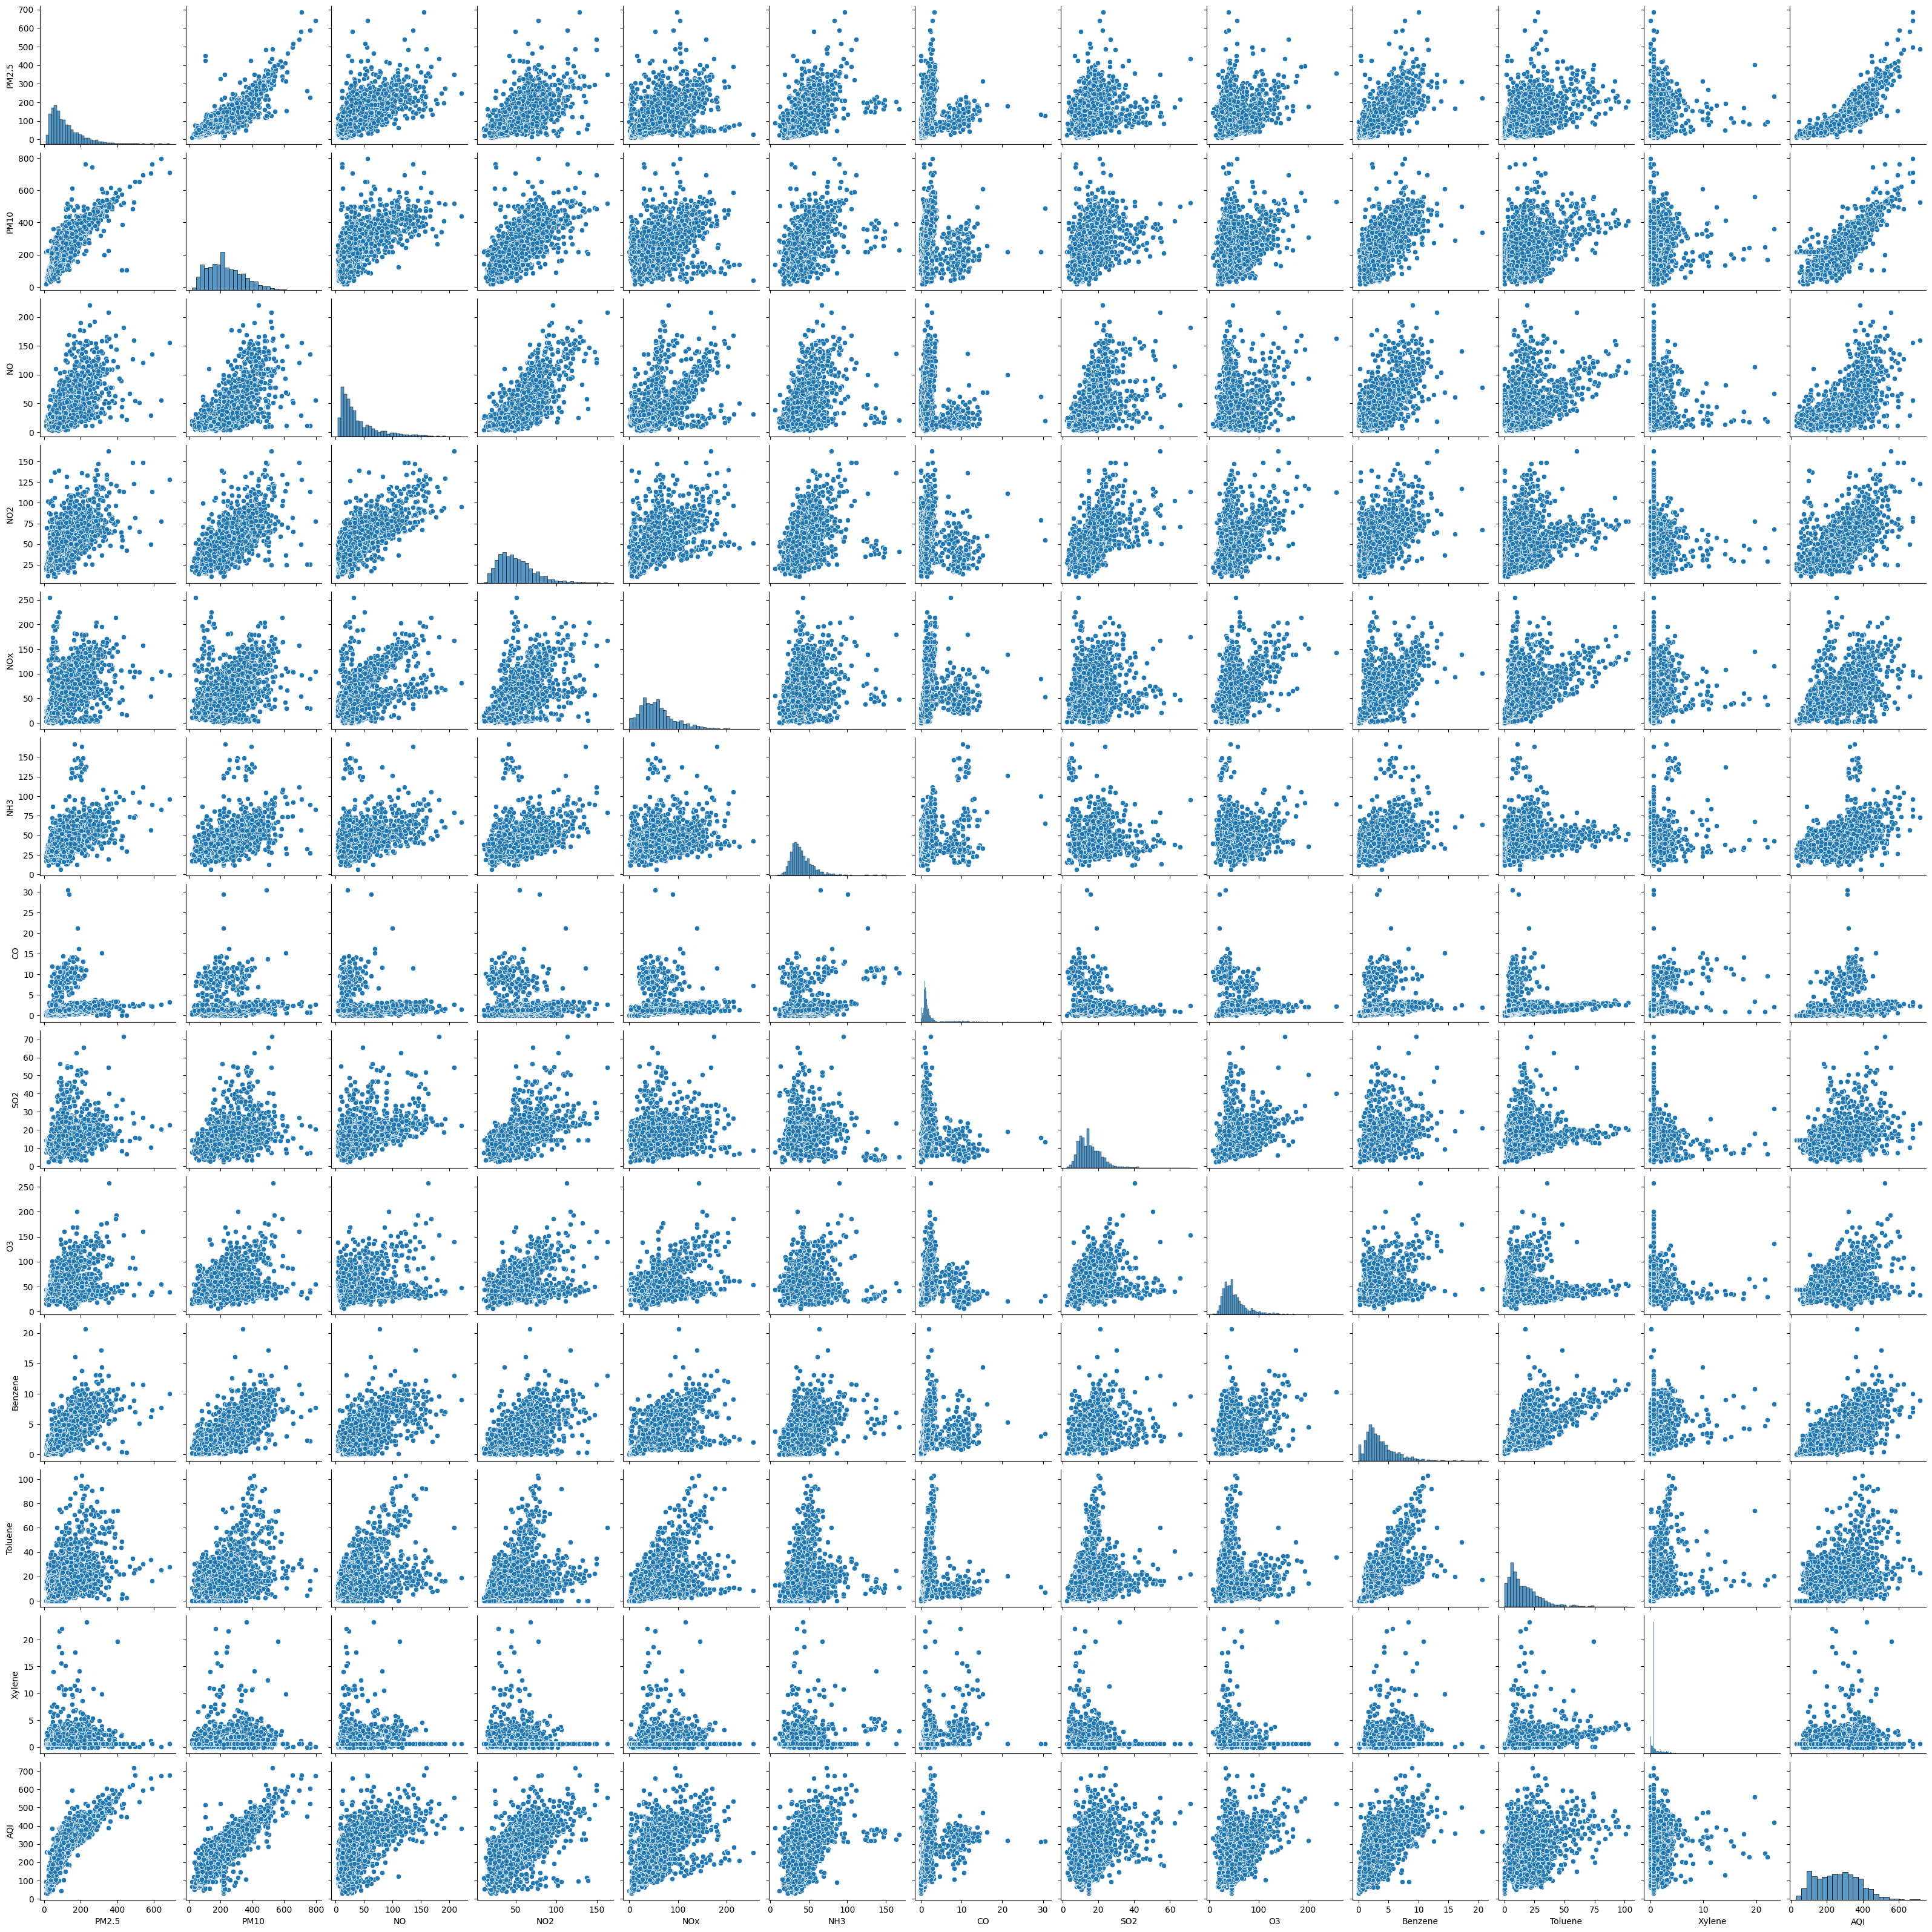

In [15]:
sns.pairplot(df)

In [16]:
def remove_outlier(col):
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

We will now check for outliers and see if there are significant outliers.

In [17]:
for cols in X.columns:
  lower_range, upper_range = remove_outlier(X[cols])
  X[cols] = np.where(X[cols] > upper_range, upper_range, X[cols])
  X[cols] = np.where(X[cols] < lower_range, lower_range, X[cols])

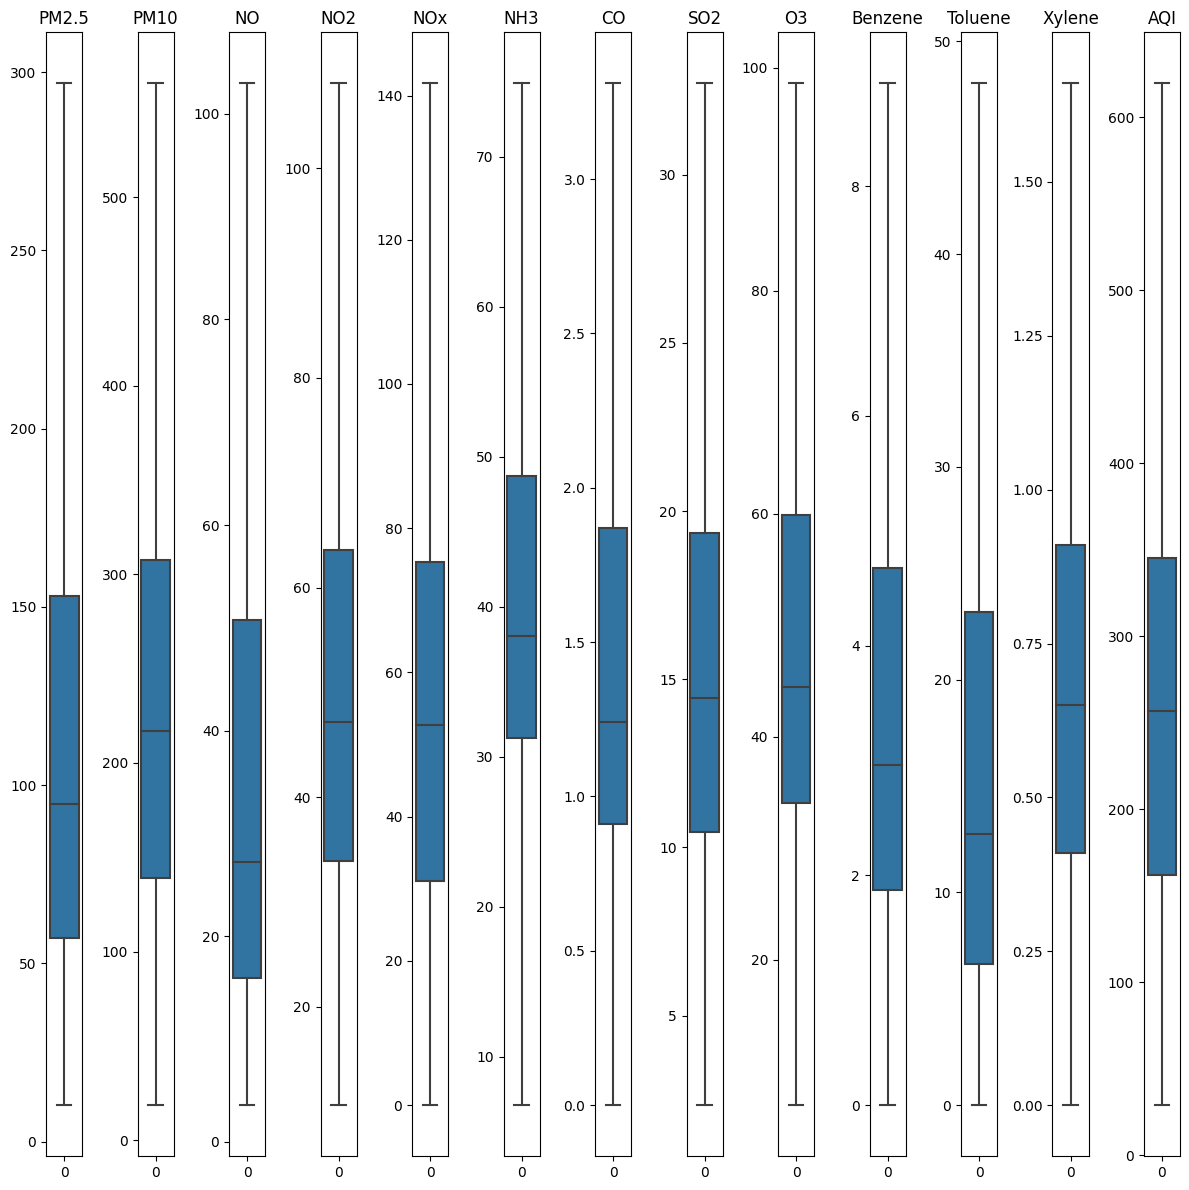

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=13, figsize=(12, 12))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.boxplot(data=X[column], ax=axes[i])
    axes[i].set_title(column)  
fig.tight_layout()

plt.show()

We will now use Decision Tree algorithm to predict the values of AQI_Bucket. THis algorithm is not sensitive to scaled data or multicolinearity in the data. However, we have treated the outliers. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3, criterion = "gini")

In [30]:
decision_tree = decision_tree.fit(X_train, y_train)

In [31]:
decision_tree.score(X_train, y_train)

0.9893758300132802

In [32]:
decision_tree.score(X_test, y_test)

0.9900596421471173

In [33]:
decision_tree.predict([[54.01,	128.66,	6.33,	21.05, 16.81,	29.06,	0.97,	11.15,	29.73,	2.03,	23.57,	0.65,	101]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Moderate'], dtype=object)

In [37]:
y_predicted = decision_tree.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test, y_predicted)

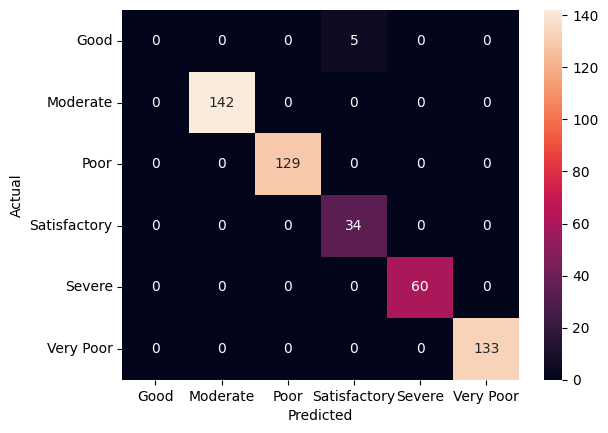

In [52]:
categories = ['Good', 'Moderate', 'Poor', 'Satisfactory', 'Severe', 'Very Poor']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see that we have got a really good accuracy with the Decision Tree Model, where we have lacked to predict Good as Satisfactory, which is not a bad prediction. 

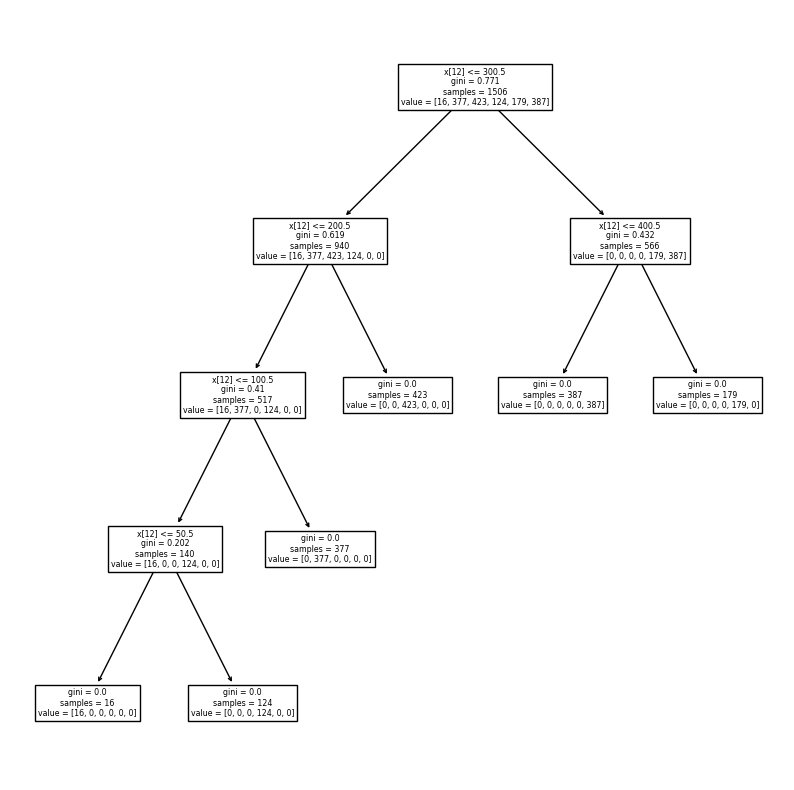

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create and train your decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, ax=ax)
plt.show()